In [22]:
import scrapy
from scrapy.http import TextResponse
from selenium import webdriver

In [27]:
# 링크
url = "https://news.nate.com/section?mid=n0200"
driver = webdriver.Chrome(r'C:\Users\Gk\Documents\dev\etc\chromedriver.exe')
driver.get(url)

In [28]:
elements = driver.find_elements_by_xpath('//*[@id="newsContents"]/div[16]/div[1]/ul/li/a')
links = [element.get_attribute("href") for element in elements]
links

['https://news.nate.com/view/20200710n19461?mid=n0200',
 'https://news.nate.com/view/20200710n19462?mid=n0200',
 'https://news.nate.com/view/20200710n19451?mid=n0200',
 'https://news.nate.com/view/20200710n18739?mid=n0200',
 'https://news.nate.com/view/20200710n18731?mid=n0200',
 'https://news.nate.com/view/20200710n18383?mid=n0200',
 'https://news.nate.com/view/20200710n18368?mid=n0200',
 'https://news.nate.com/view/20200710n17971?mid=n0200',
 'https://news.nate.com/view/20200710n17612?mid=n0200',
 'https://news.nate.com/view/20200710n17572?mid=n0200',
 'https://news.nate.com/view/20200710n17515?mid=n0200',
 'https://news.nate.com/view/20200710n17516?mid=n0200',
 'https://news.nate.com/view/20200710n17394?mid=n0200',
 'https://news.nate.com/view/20200710n15325?mid=n0200',
 'https://news.nate.com/view/20200710n10311?mid=n0200',
 'https://news.nate.com/view/20200710n10243?mid=n0200',
 'https://news.nate.com/view/20200710n07769?mid=n0200',
 'https://news.nate.com/view/20200710n05755?mid=

In [29]:
# 상세페이지 : sc
url = links[0]
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
response

<200 https://news.nate.com/view/20200710n19461?mid=n0200>

In [65]:
title = response.xpath('//*[@id="articleView"]/h3')[0].extract().split(">")[1].split("<")[0]
title = title.replace("\'", "")
category = response.xpath('//*[@id="header"]/div[2]/div/ul/li[3]/a')[0].extract().split(">")[1].split("<")[0]
summary = response.xpath('//*[@id="realArtcContents"]/b[1]/text()').extract()
summary = "".join(summary)
content = response.xpath('//*[@id="realArtcContents"]/text()').extract()
content = "".join(content).strip()
content

"정부가 내놓는 부동산 정책이 매번 시장에서 통하지 않으면서 민심 이반의 악재로 작용하자, 여당인 더불어민주당이 서울 주택 공급 등 과감한 공급대책을 준비하고 있는 것으로 알려졌다. 주무부처인 국토교통부가 그동안 내놓은 부동산 대책들이 급등 지역을 단순히 누르는 ‘땜질 처방’에 그쳤다는 문제의식에 따른 것이다. 부동산 대책을 두고 당정이 손발이 잘 맞지 않는다는 지적도 나온다.7일 민주당 관계자들에 따르면 이해찬 당 대표는 전날 열린 고위전략회의에서 “주택 공급 방식을 새롭게 해보자”며 공급 방식에 대한 검토를 주문했다.민주당 당직자들 사이에서는 서울 주변 신도시가 아닌 서울 지역 공급 확대가 필요하다는 말이 많다. 민주당 핵심 관계자는 “그린벨트 해제나 대규모 공공시설물 이전밖에 현실적 대안이 없다”고 말했다. 이 대표는 지난주 규제 중심 부동산 대책의 한계를 인정하고 공급 대책을 강조한 바 있다.문재인 대통령도 지난 2일 김현미 국토부 장관을 청와대로 불러 주택시장 관련 긴급 보고를 받은 뒤 주택 공급 물량을 확대하라고 지시했다.민주당 내부에서는 그간 정부가 주도해 온 ‘수요억제형’ 부동산 대책이 튀어 오르는 지역을 단순히 누르는 임시 처방에 그쳤다는 의견이 지배적이다. 또 민주당 당직자는 “전날 당 내부 회의에서 지금까지의 부동산 대책은 임기응변에 그쳤다는 의견이 나왔다”면서 “국토부에 너무 의존하지 말고, 예컨대 당정협의 과정에서 심의 등만 하지 말고 당이 주도적으로 부동산 대책을 이끌어야 한다는 공감대를 이뤘다”고 말했다.지금까지 21번 발표된 대책은 국토부 등 정부가 안을 짜오면 당정협의를 통해 확정되는 방식이었는데, 앞으로는 당이 주도권을 가지고 정부와 밑그림을 짜겠다는 점을 시사한 것으로 해석된다.실제 민주당은 사안의 시급성을 감안해 조만간 부동산 관련 태스크포스(TF)를 구성하기로 했다. 국회 국토교통위원회를 비롯해 기획재정위원회, 행정안전위원회 위원들이 다양하게 구성되는 방안이 논의될 것으로 보인다. 하지만 정부는 여전히 다주택자 세 부담 강

# Scrapy 작성

In [66]:
!scrapy startproject newsNate

New Scrapy project 'newsNate', using template directory 'c:\users\gk\anaconda3\lib\site-packages\scrapy\templates\project', created in:
    C:\Users\Gk\Documents\dev\Crawling\newsNate\newsNate

You can start your first spider with:
    cd newsNate
    scrapy genspider example example.com


In [45]:
%%writefile newsNate/newsNate/items.py
import scrapy

class NewsnateItem(scrapy.Item):
    title = scrapy.Field()
    content = scrapy.Field()
    category = scrapy.Field()
    summary = scrapy.Field()    
    link = scrapy.Field()

Overwriting newsNate/newsNate/items.py


In [44]:
%%writefile newsNate/newsNate/spiders/spider.py
import scrapy
import requests
from scrapy.http import TextResponse
from newsNate.items import NewsnateItem
from selenium import webdriver

class NateSpider(scrapy.Spider):
    name = "NewsNate"
    allow_domain = ["https://news.nate.com/"]
    start_urls = ["https://news.nate.com/section?mid=n0200"]
   
    def parse(self, response):
        for code in range(200, 700, 100):
            url = "https://news.nate.com/section?mid=n0{}".format(code)
            req = requests.get(url)
            response = TextResponse(req.url, body=req.text, encoding="utf-8")
            links = response.xpath('//*[@id="newsContents"]/div[16]/div[1]/ul/li/a/@href').extract()
            links = ["https:" + link for link in links]
            for link in links:
                yield scrapy.Request(link, callback=self.parse_content)

    def parse_content(self, response):
        item = NewsnateItem()
        title = response.xpath('//*[@id="articleView"]/h3')[0].extract().split(">")[1].split("<")[0]
        item['title'] = title.replace("\'", "")
        item['category'] = response.xpath('//*[@id="header"]/div[2]/div/ul/li[3]/a')[0].extract().split(">")[1].split("<")[0]
        summary = response.xpath('//*[@id="realArtcContents"]/b[1]/text()').extract()
        item['summary'] = "".join(summary)
        content = response.xpath('//*[@id="realArtcContents"]/text()').extract()
        item['content'] = "".join(content).strip()
        item['link'] = response.url
        yield item

Overwriting newsNate/newsNate/spiders/spider.py


In [31]:
code = 200
url = "https://news.nate.com/section?mid=n0{}".format(code)
req = requests.get(url)
response = TextResponse(req.url, body=req.text, encoding="utf-8")
links = response.xpath('//*[@id="newsContents"]/div[16]/div[1]/ul/li/a/@href').extract()
links = ["https:" + link for link in links]
links

['https://news.nate.com/view/20200711n08650?mid=n0200',
 'https://news.nate.com/view/20200711n08651?mid=n0200',
 'https://news.nate.com/view/20200711n05500?mid=n0200',
 'https://news.nate.com/view/20200711n03221?mid=n0200',
 'https://news.nate.com/view/20200711n02348?mid=n0200',
 'https://news.nate.com/view/20200711n01474?mid=n0200',
 'https://news.nate.com/view/20200711n01150?mid=n0200',
 'https://news.nate.com/view/20200711n01147?mid=n0200',
 'https://news.nate.com/view/20200711n01148?mid=n0200',
 'https://news.nate.com/view/20200711n01138?mid=n0200',
 'https://news.nate.com/view/20200711n01139?mid=n0200',
 'https://news.nate.com/view/20200711n01140?mid=n0200',
 'https://news.nate.com/view/20200711n01101?mid=n0200',
 'https://news.nate.com/view/20200711n01000?mid=n0200',
 'https://news.nate.com/view/20200711n00989?mid=n0200',
 'https://news.nate.com/view/20200711n00983?mid=n0200',
 'https://news.nate.com/view/20200711n00984?mid=n0200',
 'https://news.nate.com/view/20200711n00985?mid=

In [72]:
!sed -i 's/ROBOTSTXT_OBEY = True/ROBOTSTXT_OBEY = False/' newsNate/newsNate/settings.py

In [3]:
%%writefile run.sh
cd ~/python3/Crawling/newsNate && scrapy crawl NewsNate -o nate_article.csv -

Overwriting run.sh


In [6]:
!bash run.sh

run.sh: line 1: scrapy: command not found


In [14]:
import subprocess
subprocess.call(["sh", "./run.sh"])

0

In [42]:
%%writefile nate.py
import subprocess
from pathlib import Path
import os

class Nate():
        
    def clean(self):
        nateFile = Path("newsNate/nate_article.csv")
        if nateFile.is_file():
            print("Cleaned.")
            os.remove(nateFile)    
        else:
            print("Cleaning not necessary.")

    def run(self):
        subprocess.call(["source", "~/Documents/dev/Crawling/newsNate/run.sh"])
        
    def main(self):
        self.clean()
        self.run()

Overwriting nate.py


# Pipeline settings

In [50]:
import pymongo
client = pymongo.MongoClient("mongodb://")
db = client.nate
collection = db.article

collection.insert({"title": "data1"})

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  


ObjectId('5f097e014c9fb1ff5f6beddc')

In [1]:
%%writefile newsNate/newsNate/mongodb.py
import pymongo

client = pymongo.MongoClient("mongodb://")
# db = client.nate
# collection = db.article
db_nate = client.nate
collection_nate = db_nate.article
db = client.all
collection_all = db.article


Overwriting newsNate/newsNate/mongodb.py


In [2]:
%%writefile newsNate/newsNate/pipelines.py
from itemadapter import ItemAdapter
from .mongodb import collection

# import json, time

class NewsnatePipeline:

    def process_item(self, item, spider):
        
        data = {
            "title": item["title"],
            "category": item["category"],
            "content": item["content"],
            "link": item["link"],
        }
        collection.insert(data)
   
        return item


Overwriting newsNate/newsNate/pipelines.py


In [ ]:
df = pd.read_csv('newsNate/article.csv')
df

In [40]:
from konlpy.tag import Okt
from tqdm import tqdm
from nltk import FreqDist
from wordcloud import WordCloud
from datetime import datetime

def tokenize(doc):
    tagger = Okt()
    tokens = [t for t in tagger.nouns(doc)]
    return tokens

def towordcloud(df):
    df = df.dropna()
    docs = tuple([x for x in df.to_numpy()])
    sentences = []
    for d in tqdm(docs):
        tokens = [token for token in tokenize(d) if token.isalnum()]
        sentences.append(tokens)
    words = [word for sentence in sentences for word in sentence]
    words = [word for word in words if len(word) > 1]
    words_remove = ['으로', '에서', '에도', '했다', '있다', '이다', '무단', '배포', '위해', '대표', '때문', 
                    '그룹', '통해', '최근', '경우', '이번', '이후', '라며', '지난', '대해', '기자', '관련',
                   ]
    words_r = [word for word in words if word not in words_remove]
    fd = FreqDist(words_r)
#     print(fd.most_common(20))
    font_path = r'C:\Users\Gk\Documents\dev\Crawling\koverwatch.ttf'
    wc = WordCloud(width=1000, height=600, background_color="white", random_state=0,
                  font_path=font_path)
    plt.imshow(wc.generate_from_frequencies(fd))
    plt.axis("off")
    str = "wordcloud_" + datetime.now().strftime("%d.%m.%Y_%H.%M.%S") + ".png"
    plt.savefig(str)
    plt.show()

100%|██████████| 72/72 [00:04<00:00, 15.41it/s]


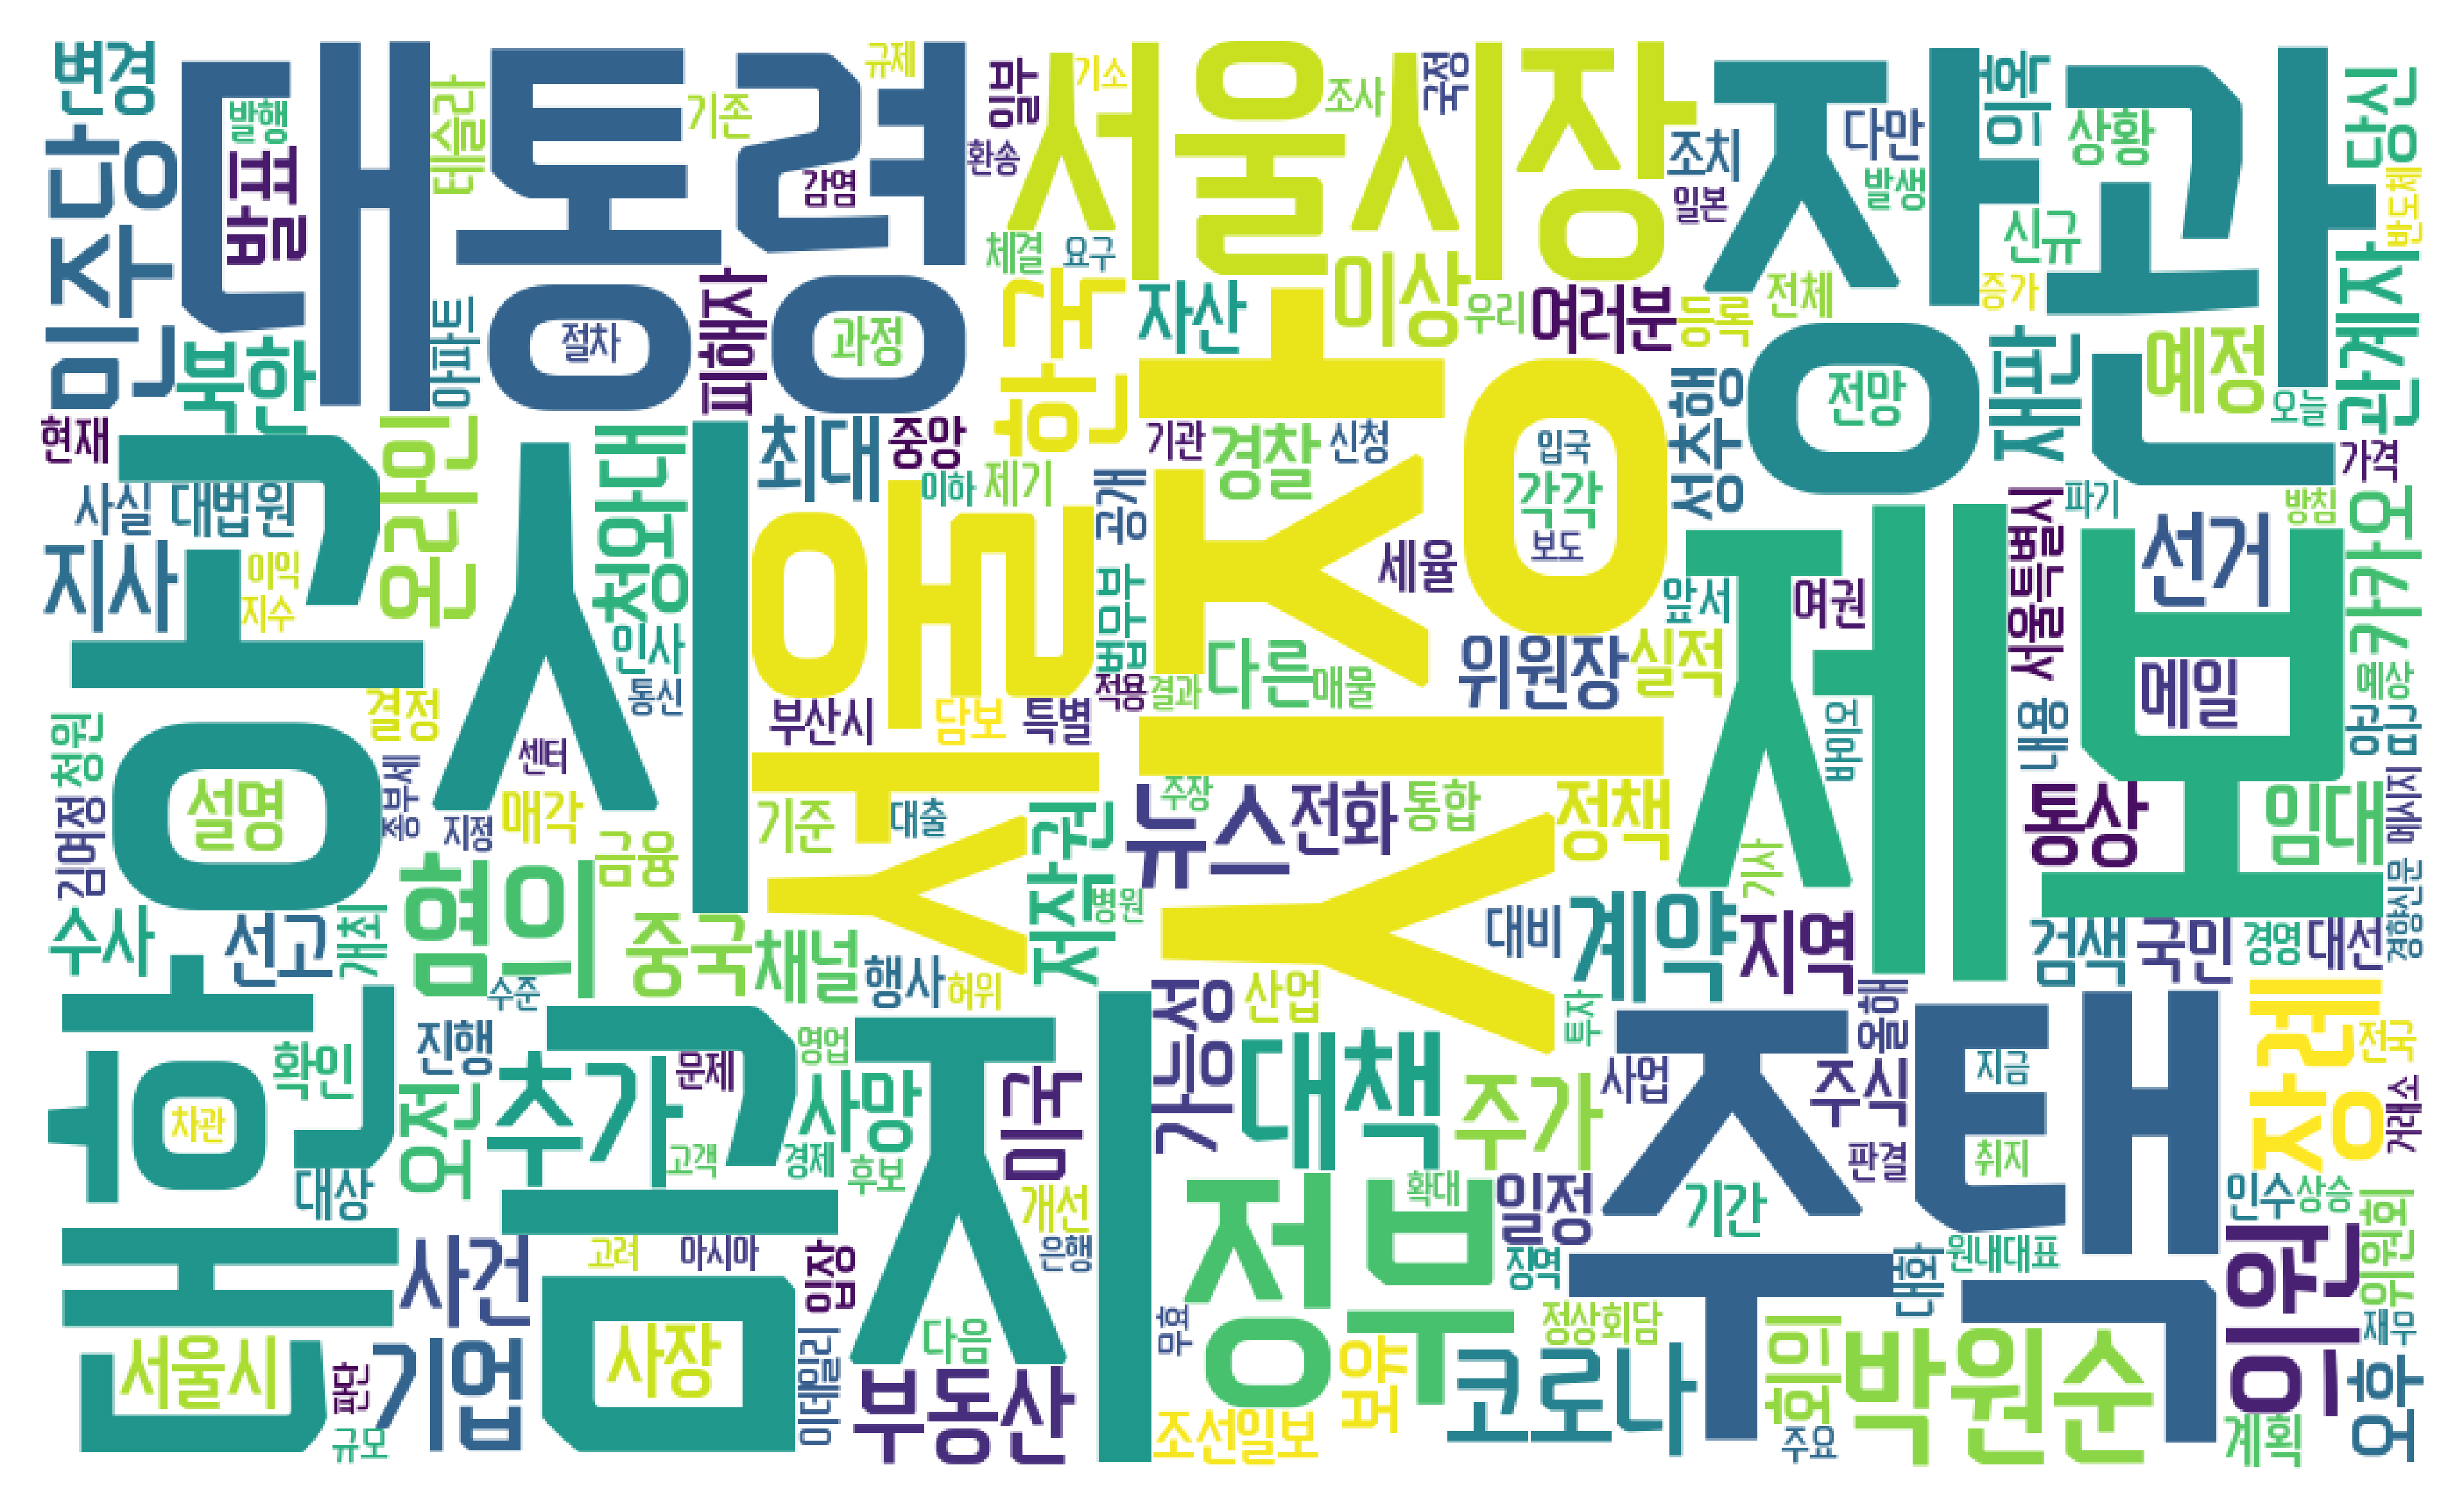

In [41]:
towordcloud(df['content'])